# HW 1.
Update your knowledge about linear basics with PyTorch

## Task 1.1

1. Review your understanding of Tensor:
[TensorFlow Guide on Tensors](https://www.tensorflow.org/guide/tensor), 
[PyTorch Tensor](https://pytorch.org/docs/stable/tensors.html)
2. Write implementation of the **matrix_vector_multiply**. Test **TestMatrixVectorMultiplication** should be passed

In [186]:
import torch
import unittest

# Define a 3x3 matrix
matrix_a = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=torch.float32)

# Define a 3x1 vector
vector_v = torch.tensor([
    [1],
    [2],
    [3]
], dtype=torch.float32)


In [187]:
def matrix_vector_multiply(m: torch.tensor, v: torch.tensor):
    """
    Provides implementation of the matrix vector multiplication

    Args:
        m (torch.tensor of float): 2D tensor-matrix, some of axes may be redundant 
        v (torch.tensor of float): vector or 1D matrix

    Returns:
        Vector-column (torch.tensor of float), result of multiplication of the input matrix and vector

    """
    # removing redundant dimentions
    m = m.squeeze()  
    v = v.squeeze()
    # raise exceptions
    if len(m.shape)!=2:
        raise ValueError('First tensor should be 2D matrix')
    if len(v.shape)!=1:
        raise ValueError('Second tensor should be 1D vector')
    if m.shape[1]!=v.shape[0]:
        raise ValueError('Number of matrix columns and vector elements should be equal')
    # initializing output vector-tensor
    output = torch.tensor(()).new_zeros(m.shape[0])

    # Variant#1. Element-wise implementation:
    for i, row in enumerate(m):
        for j in range(len(row)):
            output[i] = output[i].add(row[j].item()*v[j].item())

    # Variant#2. Vector-wise implementation:
    for i, row in enumerate(m):
        output[i] = torch.inner(row, v)

    # Variant#3. Matrix-wise implementation:
    output = torch.matmul(m, v)

    return output.view(-1,1) # transforming output to Vector-column

In [188]:
expected_result = torch.tensor([
            [14],
            [32],
            [50]
        ], dtype=torch.float32)

class TestMatrixVectorMultiplication(unittest.TestCase):
    def test_matrix_vector_multiply(self):
        result = matrix_vector_multiply(matrix_a, vector_v)
        print(result)
        self.assertTrue(torch.equal(result, expected_result))

if __name__ == "__main__":
    # TODO uncomment the test. All tesh should be passed
    unittest.main(argv=[''], verbosity=2, exit=False)
    pass

test_matrix_vector_multiply (__main__.TestMatrixVectorMultiplication) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.018s

OK


tensor([[14.],
        [32.],
        [50.]])


## Task 1.2

1. Read .txt files from ./data/image_matrices/. Files contains 2D matrices with image information.
2. Use 'torch' for the processing 'np' arrays as a tensor.
3. Show image in the jupiter notebook based on prepared tensor

4. Explain why PyTorch by default has 4 channels for RGB (channel 1 = R, channel 2 = G, channel 3 = B) images instead of 3 channels: 

// 4th (alpha) channel enables to achieve localized texture invisibility allowing any background to show through.

Channel 0 shape =  (512, 868)
Channel 1 shape =  (512, 868)
Channel 2 shape =  (512, 868)
Channel 3 shape =  (512, 868)


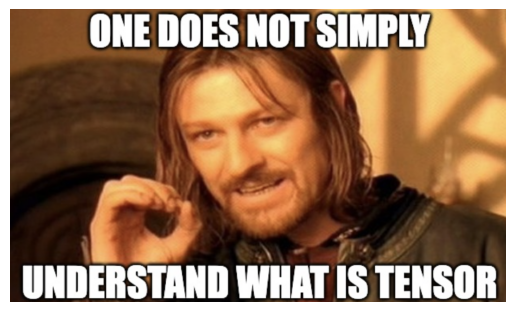

In [189]:
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

secret_img_channels = []
for i in range(4):
    secret_img_channels.append(np.loadtxt(f'./data/img_matrices/matrix_2D_channel_{i}.txt', delimiter=','))

for i in range(4):
    print(f"Channel {i} shape = ", secret_img_channels[i].shape)    

#TODO use 'torch' for the processing 'np' arrays as a tensor. Please see:
# https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html
# https://www.geeksforgeeks.org/python-pytorch-stack-method/
# https://pytorch.org/docs/stable/generated/torch.stack.html

# producing tensors responsible for each channel
img_channels={}
channels = ['red','green','blue','trans']
for i, channel in enumerate(channels):
    img_channels[channel] = torch.tensor(secret_img_channels[i])

# stacking to the tensor with additional dimention responsible for channel 
stacked_tensor = torch.stack([tensor for tensor in img_channels.values()], dim=-1)

# however w/o stacking it can be done more easy by directly transforming secret_img_channels list to the tensor and permuting axes:
stacked_tensor = torch.tensor(secret_img_channels).permute(1,2,0)

# Visualize the tensor converted to Numpy array
plt.imshow(stacked_tensor.numpy())
plt.axis('off')
plt.show()